In [92]:
from pyspark.sql import SparkSession, SQLContext
from pyspark.sql.types import IntegerType, StringType, StructField, StructType, DoubleType
from pyspark.sql.functions import col, lit

import pandas as pd
from pandas import DataFrame
import matplotlib

import os

In [3]:
%config IPCompleter.greedy=True

In [4]:
spark = SparkSession.builder.appName("BasicETL").config('spark.master', 'local[4]').config('spark.shuffle.sql.partitions', 1).getOrCreate()
spark

In [5]:
data_path = 'DataSets/'
os.listdir(data_path)

['archive', 'archive.zip', 'business.csv', 'parquet_example.parquet']

In [6]:
df = spark.read.csv('DataSets/business.csv', sep=',', header=True)
df.count()

1936

In [7]:
df.show(5)

+----------------+-------+----------+----------+------+-------+---------+--------------------+--------------------+--------------------+--------------------+--------------+--------------+--------------+
|Series_reference| Period|Data_value|Suppressed|STATUS|  UNITS|Magnitude|             Subject|               Group|      Series_title_1|      Series_title_2|Series_title_3|Series_title_4|Series_title_5|
+----------------+-------+----------+----------+------+-------+---------+--------------------+--------------------+--------------------+--------------------+--------------+--------------+--------------+
|   BDCQ.SF1AA2CA|2016.06|  1116.386|      NULL|     F|Dollars|        6|Business Data Col...|Industry by finan...|Sales (operating ...|Forestry and Logging|Current prices|    Unadjusted|          NULL|
|   BDCQ.SF1AA2CA|2016.09|  1070.874|      NULL|     F|Dollars|        6|Business Data Col...|Industry by finan...|Sales (operating ...|Forestry and Logging|Current prices|    Unadjusted| 

In [8]:
df.printSchema()

root
 |-- Series_reference: string (nullable = true)
 |-- Period: string (nullable = true)
 |-- Data_value: string (nullable = true)
 |-- Suppressed: string (nullable = true)
 |-- STATUS: string (nullable = true)
 |-- UNITS: string (nullable = true)
 |-- Magnitude: string (nullable = true)
 |-- Subject: string (nullable = true)
 |-- Group: string (nullable = true)
 |-- Series_title_1: string (nullable = true)
 |-- Series_title_2: string (nullable = true)
 |-- Series_title_3: string (nullable = true)
 |-- Series_title_4: string (nullable = true)
 |-- Series_title_5: string (nullable = true)



In [9]:
sel_cols = ['Series_title_1', 'Series_title_2', 'Series_title_3', 'Series_title_4', 'Series_title_5']

In [10]:
df_sel = df.select(sel_cols)
df_sel.show(5)

+--------------------+--------------------+--------------+--------------+--------------+
|      Series_title_1|      Series_title_2|Series_title_3|Series_title_4|Series_title_5|
+--------------------+--------------------+--------------+--------------+--------------+
|Sales (operating ...|Forestry and Logging|Current prices|    Unadjusted|          NULL|
|Sales (operating ...|Forestry and Logging|Current prices|    Unadjusted|          NULL|
|Sales (operating ...|Forestry and Logging|Current prices|    Unadjusted|          NULL|
|Sales (operating ...|Forestry and Logging|Current prices|    Unadjusted|          NULL|
|Sales (operating ...|Forestry and Logging|Current prices|    Unadjusted|          NULL|
+--------------------+--------------------+--------------+--------------+--------------+
only showing top 5 rows



In [11]:
df[sel_cols].show(5)

+--------------------+--------------------+--------------+--------------+--------------+
|      Series_title_1|      Series_title_2|Series_title_3|Series_title_4|Series_title_5|
+--------------------+--------------------+--------------+--------------+--------------+
|Sales (operating ...|Forestry and Logging|Current prices|    Unadjusted|          NULL|
|Sales (operating ...|Forestry and Logging|Current prices|    Unadjusted|          NULL|
|Sales (operating ...|Forestry and Logging|Current prices|    Unadjusted|          NULL|
|Sales (operating ...|Forestry and Logging|Current prices|    Unadjusted|          NULL|
|Sales (operating ...|Forestry and Logging|Current prices|    Unadjusted|          NULL|
+--------------------+--------------------+--------------+--------------+--------------+
only showing top 5 rows



In [12]:
df = df.withColumnRenamed('Series_title_1', 'ST_1')
df.show(2)

+----------------+-------+----------+----------+------+-------+---------+--------------------+--------------------+--------------------+--------------------+--------------+--------------+--------------+
|Series_reference| Period|Data_value|Suppressed|STATUS|  UNITS|Magnitude|             Subject|               Group|                ST_1|      Series_title_2|Series_title_3|Series_title_4|Series_title_5|
+----------------+-------+----------+----------+------+-------+---------+--------------------+--------------------+--------------------+--------------------+--------------+--------------+--------------+
|   BDCQ.SF1AA2CA|2016.06|  1116.386|      NULL|     F|Dollars|        6|Business Data Col...|Industry by finan...|Sales (operating ...|Forestry and Logging|Current prices|    Unadjusted|          NULL|
|   BDCQ.SF1AA2CA|2016.09|  1070.874|      NULL|     F|Dollars|        6|Business Data Col...|Industry by finan...|Sales (operating ...|Forestry and Logging|Current prices|    Unadjusted| 

In [13]:
df.sort('Data_value').show(5)

+----------------+-------+----------+----------+------+-------+---------+--------------------+--------------------+------------------+--------------------+--------------+--------------+--------------+
|Series_reference| Period|Data_value|Suppressed|STATUS|  UNITS|Magnitude|             Subject|               Group|              ST_1|      Series_title_2|Series_title_3|Series_title_4|Series_title_5|
+----------------+-------+----------+----------+------+-------+---------+--------------------+--------------------+------------------+--------------------+--------------+--------------+--------------+
|   BDCQ.SF8GH2CA|2020.06|  -398.194|      NULL|     F|Dollars|        6|Business Data Col...|Industry by finan...|  Operating profit|Accommodation and...|Current prices|    Unadjusted|          NULL|
|   BDCQ.SF8RS2CA|2020.06|     -5.26|      NULL|     F|Dollars|        6|Business Data Col...|Industry by finan...|  Operating profit|      Other Services|Current prices|    Unadjusted|          N

In [14]:
from pyspark.sql import functions as F

In [15]:
df.sort(F.desc('Data_value')).show(5)

+----------------+-------+----------+----------+------+-------+---------+--------------------+--------------------+--------------------+--------------------+--------------+--------------+--------------+
|Series_reference| Period|Data_value|Suppressed|STATUS|  UNITS|Magnitude|             Subject|               Group|                ST_1|      Series_title_2|Series_title_3|Series_title_4|Series_title_5|
+----------------+-------+----------+----------+------+-------+---------+--------------------+--------------------+--------------------+--------------------+--------------+--------------+--------------+
|   BDCQ.SF3GH2CA|2017.09|   998.124|      NULL|     F|Dollars|        6|Business Data Col...|Industry by finan...|  Salaries and wages|Accommodation and...|Current prices|    Unadjusted|          NULL|
|   BDCQ.SF2EE1CA|2018.03|  9979.557|      NULL|     F|Dollars|        6|Business Data Col...|Industry by finan...|Purchases and ope...|        Construction|Current prices|    Unadjusted| 

In [16]:
# cambiar tipo de columna
df = df.withColumn('Data_value', F.col('Data_value').cast(DoubleType()))
df.printSchema()

root
 |-- Series_reference: string (nullable = true)
 |-- Period: string (nullable = true)
 |-- Data_value: double (nullable = true)
 |-- Suppressed: string (nullable = true)
 |-- STATUS: string (nullable = true)
 |-- UNITS: string (nullable = true)
 |-- Magnitude: string (nullable = true)
 |-- Subject: string (nullable = true)
 |-- Group: string (nullable = true)
 |-- ST_1: string (nullable = true)
 |-- Series_title_2: string (nullable = true)
 |-- Series_title_3: string (nullable = true)
 |-- Series_title_4: string (nullable = true)
 |-- Series_title_5: string (nullable = true)



In [37]:
df.sort(F.desc('Data_value')).show(5)

+----------------+-------+----------+----------+------+-------+---------+--------------------+--------------------+--------------------+---------------+--------------+--------------+--------------+----+-----+
|Series_reference| Period|Data_value|Suppressed|STATUS|  UNITS|Magnitude|             Subject|               Group|                ST_1| Series_title_2|Series_title_3|Series_title_4|Series_title_5|year|month|
+----------------+-------+----------+----------+------+-------+---------+--------------------+--------------------+--------------------+---------------+--------------+--------------+--------------+----+-----+
|   BDCQ.SF1FF1CA|2020.12| 30657.717|      NULL|     F|Dollars|        6|Business Data Col...|Industry by finan...|Sales (operating ...|Wholesale Trade|Current prices|    Unadjusted|          NULL|2020|   12|
|   BDCQ.SF1FF1CA|2019.12| 29838.982|      NULL|     F|Dollars|        6|Business Data Col...|Industry by finan...|Sales (operating ...|Wholesale Trade|Current pric

In [18]:
df_filter = df.filter(F.col('Data_value') > 500)
df_filter.count(), df.count()

(1320, 1936)

In [19]:
df_filter = df.filter( (F.col('Data_value') > 100) &
                       (F.col('STATUS') == 'R') )
df_filter.count(), df.count()

(20, 1936)

In [20]:
df = df.withColumn('year', F.split('Period', '\.')[0].cast(IntegerType()))
df = df.withColumn('month', F.split('Period', '\.')[1].cast(IntegerType()))
df.show(5)

+----------------+-------+----------+----------+------+-------+---------+--------------------+--------------------+--------------------+--------------------+--------------+--------------+--------------+----+-----+
|Series_reference| Period|Data_value|Suppressed|STATUS|  UNITS|Magnitude|             Subject|               Group|                ST_1|      Series_title_2|Series_title_3|Series_title_4|Series_title_5|year|month|
+----------------+-------+----------+----------+------+-------+---------+--------------------+--------------------+--------------------+--------------------+--------------+--------------+--------------+----+-----+
|   BDCQ.SF1AA2CA|2016.06|  1116.386|      NULL|     F|Dollars|        6|Business Data Col...|Industry by finan...|Sales (operating ...|Forestry and Logging|Current prices|    Unadjusted|          NULL|2016|    6|
|   BDCQ.SF1AA2CA|2016.09|  1070.874|      NULL|     F|Dollars|        6|Business Data Col...|Industry by finan...|Sales (operating ...|Forestry

In [28]:
agregate_year_df = df.groupBy('year').sum('Data_value').sort('year')
agregate_year_df = agregate_year_df.withColumnRenamed('sum(Data_value)', 'DataValueSum')
agregate_year_df.show()

+----+------------------+
|year|      DataValueSum|
+----+------------------+
|2016| 650630.5120000006|
|2017|1008174.8279999997|
|2018|1169600.8130000005|
|2019|1218257.8539999994|
|2020| 1188871.551000002|
+----+------------------+



In [29]:
agregate_year_pd_df = agregate_year_df.toPandas()

In [30]:
agregate_year_pd_df

,year,DataValueSum
0,2016,650630.512
1,2017,1008174.828
2,2018,1169600.813
3,2019,1218257.854
4,2020,1188871.551


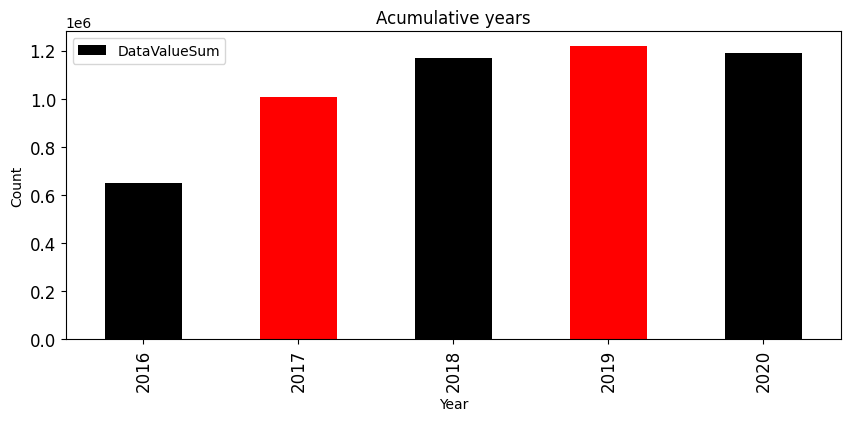

In [32]:
agregate_year_pd_df.plot.bar(
            x='year', y='DataValueSum',
            figsize=(10,4), 
            color=['black', 'red', 'black', 'red', 'black'],
            title='DataValue by years', 
            xlabel="Year", 
            ylabel="Count", 
            fontsize='large'
            );

In [67]:
df.select('STATUS').distinct().show(10, truncate=False)

+------+
|STATUS|
+------+
|F     |
|R     |
+------+



In [63]:
df.filter( (F.col('year') == 2017) & (F.col('ST_1') == 'Salaries and wages')).count()

100

In [69]:
sales_status_df = df.groupBy('year','STATUS').count().sort('year')
sales_status_df.show()

+----+------+-----+
|year|STATUS|count|
+----+------+-----+
|2016|     R|    4|
|2016|     F|  284|
|2017|     F|  400|
|2018|     F|  416|
|2019|     F|  413|
|2019|     R|    3|
|2020|     R|   13|
|2020|     F|  403|
+----+------+-----+



In [70]:
sales_status_pd_df = sales_status_df.toPandas()

In [107]:
def get_count_status_by_year(df:DataFrame, year:int, status:str):
    try:
        count = df[ (df['year'] == year ) & (df['STATUS'] == status) ]['count'].iloc[0]
    except:
        count = 0
    return count

In [108]:
new_data = [['year', 'StatusR', 'StatusF']]
years = list(sales_status_pd_df['year'].unique())
print(years)
index = 0
for year in years:
    new_data.append(
        [year, 
         get_count_status_by_year(sales_status_pd_df, year, 'R'),
         get_count_status_by_year(sales_status_pd_df, year, 'F')]
    )
new_data

[2016, 2017, 2018, 2019, 2020]


[['year', 'StatusR', 'StatusF'],
 [2016, 4, 284],
 [2017, 0, 400],
 [2018, 0, 416],
 [2019, 3, 413],
 [2020, 13, 403]]

In [109]:
status_df = pd.DataFrame(new_data[1:], columns=new_data[0])
status_df

,year,StatusR,StatusF
0,2016,4,284
1,2017,0,400
2,2018,0,416
3,2019,3,413
4,2020,13,403


In [120]:
from mplcursors import cursor

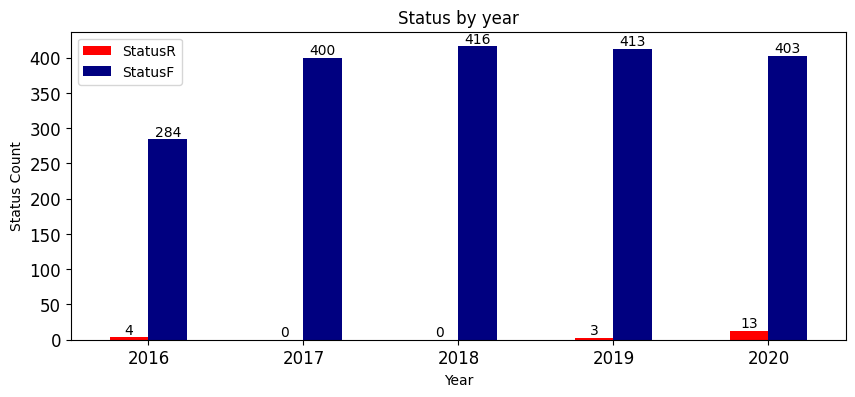

In [141]:
ax = status_df.plot.bar(
            x='year', rot=0,
            figsize=(10,4), 
            color=['red', 'navy'],
            title='Status by year', 
            xlabel="Year", 
            ylabel="Status Count", 
            fontsize='large'
            );

ax.bar_label(ax.containers[0]);
ax.bar_label(ax.containers[1]);
